# The Determinants of Corruption and State Fragility.
This is still a coding draft with limited comments on the codes and literature review. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_stata('corruption.dta')

In [3]:
df.shape

(19751, 111)

In [4]:
df.columns

Index(['countryname', 'year', 'gdp_cap', 'log_gdp_cap', 'gros_cap_form',
       'gross_fixed_form', 'total_pop', 'trade_open', 'dom_cred_fin',
       'dom_cred_private',
       ...
       'wbgi_cce', 'wbgi_ccn', 'wbgi_ccs', 'wbgi_gee', 'wbgi_gen', 'wbgi_ges',
       'wdi_psm', 'wel_coc', 'wvs_jabribe', '_merge'],
      dtype='object', length=111)

In [5]:
df = df.dropna(subset = ['ti_cpi'])

### Exclude variables with many null values. I am choosing to drop variables with null values greater than 250

In [6]:
df = df[df.columns[df.isna().sum() < 250]]

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

countryname           0
year                  0
gdp_cap               0
log_gdp_cap           0
gros_cap_form         0
gross_fixed_form      0
total_pop             0
trade_open            0
dom_cred_fin          0
dom_cred_private      0
dom_cred_banks        0
govt_cons_exp         0
gdp_per_cap_growth    0
pop_growth            0
govt_eff_err          0
currency_unit         0
Corruption_control    0
Voice                 0
Political_stab        0
Govt_Effect           0
Regulatory_qual       0
Rule_of_law           0
region                0
cpi_index             0
_merge_err_gini       0
bci_bci               0
bci_bcistd            0
dpi_maj               0
fh_fog                0
fh_pr                 0
hf_govint             0
icrg_qog              0
ti_cpi                0
ti_cpi_max            0
ti_cpi_min            0
vdem_corr             0
vdem_exbribe          0
vdem_excrptps         0
vdem_execorr          0
vdem_exembez          0
vdem_exthftps         0
vdem_gcrrpt     

In [9]:
df.head()

,countryname,year,gdp_cap,log_gdp_cap,gros_cap_form,gross_fixed_form,total_pop,trade_open,dom_cred_fin,dom_cred_private,...,vdem_jucorrdc,vdem_mecorrpt,vdem_pubcorr,wbgi_cce,wbgi_ccn,wbgi_ccs,wbgi_gee,wbgi_gen,wbgi_ges,_merge
131,Albania,2012.0,4276.620248,8.360918,28.328550,26.488677,2900401.0,76.510200,68.227508,40.804445,...,1.826164,2.444637,0.686379,-0.726501,14.0,0.124309,-0.267800,10.0,0.198437,matched (3)
132,Albania,2013.0,4327.392484,8.372721,28.052496,26.079557,2895092.0,75.873713,67.663633,39.786652,...,2.105744,2.300667,0.590835,-0.698603,13.0,0.127816,-0.316920,10.0,0.195889,matched (3)
133,Albania,2014.0,4413.115113,8.392336,25.674692,24.158673,2889104.0,75.407846,67.974734,39.261123,...,1.876464,2.300667,0.590835,-0.548199,12.0,0.129133,-0.085558,9.0,0.215891,matched (3)
134,Albania,2015.0,4524.684565,8.417303,25.819048,24.413490,2880703.0,71.801006,62.955932,37.151019,...,1.876464,2.300667,0.590835,-0.479021,12.0,0.129757,0.010404,9.0,0.216421,matched (3)
135,Albania,2016.0,4683.743890,8.451853,25.223827,24.367932,2876101.0,74.809863,61.497951,36.626870,...,1.876464,2.300667,0.590835,-0.405285,12.0,0.133379,0.005321,8.0,0.205089,matched (3)


In [10]:
print(df['region'].value_counts().head())
region_freq = df.groupby(['region'])['Corruption_control'].size()/len(df)
print(region_freq.value_counts())
df['region_freq'] = df['region'].map(region_freq)
print(df[['region', 'region_freq']])

Advanced Economies                 160
Latin America and the Caribbean    156
Sub-Saharan Africa                 139
Middle East and North Africa        64
Asia and the Pacific                60
Name: region, dtype: int64
0.2560    1
0.0960    1
0.0736    1
0.2496    1
0.1024    1
0.2224    1
Name: Corruption_control, dtype: int64
                   region  region_freq
131        Eastern Europe       0.0736
132        Eastern Europe       0.0736
133        Eastern Europe       0.0736
134        Eastern Europe       0.0736
135        Eastern Europe       0.0736
...                   ...          ...
19745  Sub-Saharan Africa       0.2224
19746  Sub-Saharan Africa       0.2224
19747  Sub-Saharan Africa       0.2224
19748  Sub-Saharan Africa       0.2224
19749  Sub-Saharan Africa       0.2224

[625 rows x 2 columns]


In [11]:
X = df[df.columns[df.columns.isin(['countryname', 'gdp_cap', 'region_freq', 'gros_cap_form', 'gross_fixed_form', 'total_pop', 'trade_open', 'dom_cred_fin', 'dom_cred_fin', 'dom_cred_private', 
        'dom_cred_banks', 'govt_exp', 'gdp_per_cap_growth', 'pop_growth', 'Voice', 'Political_stab', 'Govt_Effect', 'Regulatory_qual',
       'Rule_of_law', 'hc', 'primary', 'secondary', 'tertiary', 'region', 'bank_deposit', 'gini_disp', 'gini_mkt', 'bmr_dembr', 'bti_gi',
       'fh_fog', 'fh_pr', 'gir_csmai', 'gir_gii', 'hf_govint', 'iiag_acc', 'iiag_gov', 'iiag_pm', 'sgi_pp'])]]

In [12]:
Y = df[df.columns[df.columns.isin(['region', 'Corruption_control', 'wel_coc', 'cpi_index', 'domestic_cred', 'icrg_qog', 'ti_cpi', 'vdem_corr',  'vdem_elvotbuy', 'vdem_exbribe', 
        'vdem_excrptps', 'vdem_execorr', 'vdem_exembez', 'vdem_exthftps', 'vdem_gcrrpt', 'vdem_jucorrdc', 'vdem_mecorrpt', 'vdem_pubcorr'])]]

In [13]:
print(X.shape)
print(Y.shape)

(625, 21)
(625, 15)


In [14]:
X.isna().any()

countryname           False
gdp_cap               False
gros_cap_form         False
gross_fixed_form      False
total_pop             False
trade_open            False
dom_cred_fin          False
dom_cred_private      False
dom_cred_banks        False
gdp_per_cap_growth    False
pop_growth            False
Voice                 False
Political_stab        False
Govt_Effect           False
Regulatory_qual       False
Rule_of_law           False
region                False
fh_fog                False
fh_pr                 False
hf_govint             False
region_freq           False
dtype: bool

### How to select if there are ANY null columns

In [15]:
# How to select if there are ANY null columns
Y.isnull().any()

Corruption_control    False
region                False
cpi_index             False
icrg_qog              False
ti_cpi                False
vdem_corr             False
vdem_exbribe          False
vdem_excrptps         False
vdem_execorr          False
vdem_exembez          False
vdem_exthftps         False
vdem_gcrrpt           False
vdem_jucorrdc         False
vdem_mecorrpt         False
vdem_pubcorr          False
dtype: bool

### Create a list of null columns

In [16]:
# Create a list of null columns
null_cols = Y.columns[Y.isnull().any()]

### Get the number of null columns

In [17]:
Y[null_cols].isnull().sum()

Series([], dtype: float64)

In [18]:
Y[Y.columns[Y.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [19]:
print(X.shape)
print(Y.shape)


(625, 21)
(625, 15)


### Descriptive Statistics

In [20]:
Y.columns

Index(['Corruption_control', 'region', 'cpi_index', 'icrg_qog', 'ti_cpi',
       'vdem_corr', 'vdem_exbribe', 'vdem_excrptps', 'vdem_execorr',
       'vdem_exembez', 'vdem_exthftps', 'vdem_gcrrpt', 'vdem_jucorrdc',
       'vdem_mecorrpt', 'vdem_pubcorr'],
      dtype='object')

In [21]:
import matplotlib.pyplot as plt



In [22]:
Y.describe()


,Corruption_control,cpi_index,icrg_qog,ti_cpi,vdem_corr,vdem_exbribe,vdem_excrptps,vdem_execorr,vdem_exembez,vdem_exthftps,vdem_gcrrpt,vdem_jucorrdc,vdem_mecorrpt,vdem_pubcorr
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,0.074800,46.448000,0.546402,46.448000,0.452211,2.199434,2.047608,0.408471,2.425088,0.395240,2.048119,2.434844,2.717582,0.426586
std,1.032172,19.739756,0.206070,19.739756,0.300998,1.043643,0.983959,0.293978,1.104220,1.488612,0.931212,0.833878,0.913073,0.292372
min,-1.560000,15.000000,0.194444,15.000000,0.005486,0.115227,0.285714,0.009338,0.124501,-2.842927,0.202484,0.491579,0.355269,0.004317
25%,-0.710000,31.000000,0.388889,31.000000,0.154097,1.361480,1.261344,0.130012,1.432274,-0.668234,1.307920,1.738353,2.150739,0.137534
50%,-0.280000,39.000000,0.472222,39.000000,0.507909,2.086106,1.951181,0.379855,2.551300,0.038760,1.856234,2.391229,2.790224,0.445384
75%,0.740000,60.000000,0.666667,60.000000,0.720535,3.198811,2.857868,0.697869,3.416335,1.540654,2.823102,3.212883,3.541900,0.675361
max,2.400000,92.000000,0.981481,92.000000,0.964972,3.938704,3.932645,0.957388,3.962736,3.586421,3.909940,3.843997,3.919889,0.960388


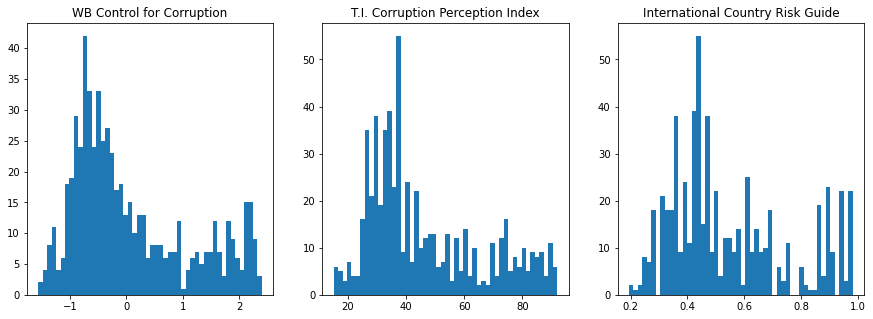

In [23]:
from matplotlib.pyplot import Subplot


fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15, 5))

ax1.hist(Y.Corruption_control, bins = 50)
ax1.set_title("WB Control for Corruption")
ax2.hist(Y.ti_cpi, bins = 50)
ax2.set_title("T.I. Corruption Perception Index")
ax3.hist(Y.icrg_qog, bins = 50)
ax3.set_title("International Country Risk Guide")

plt.show()

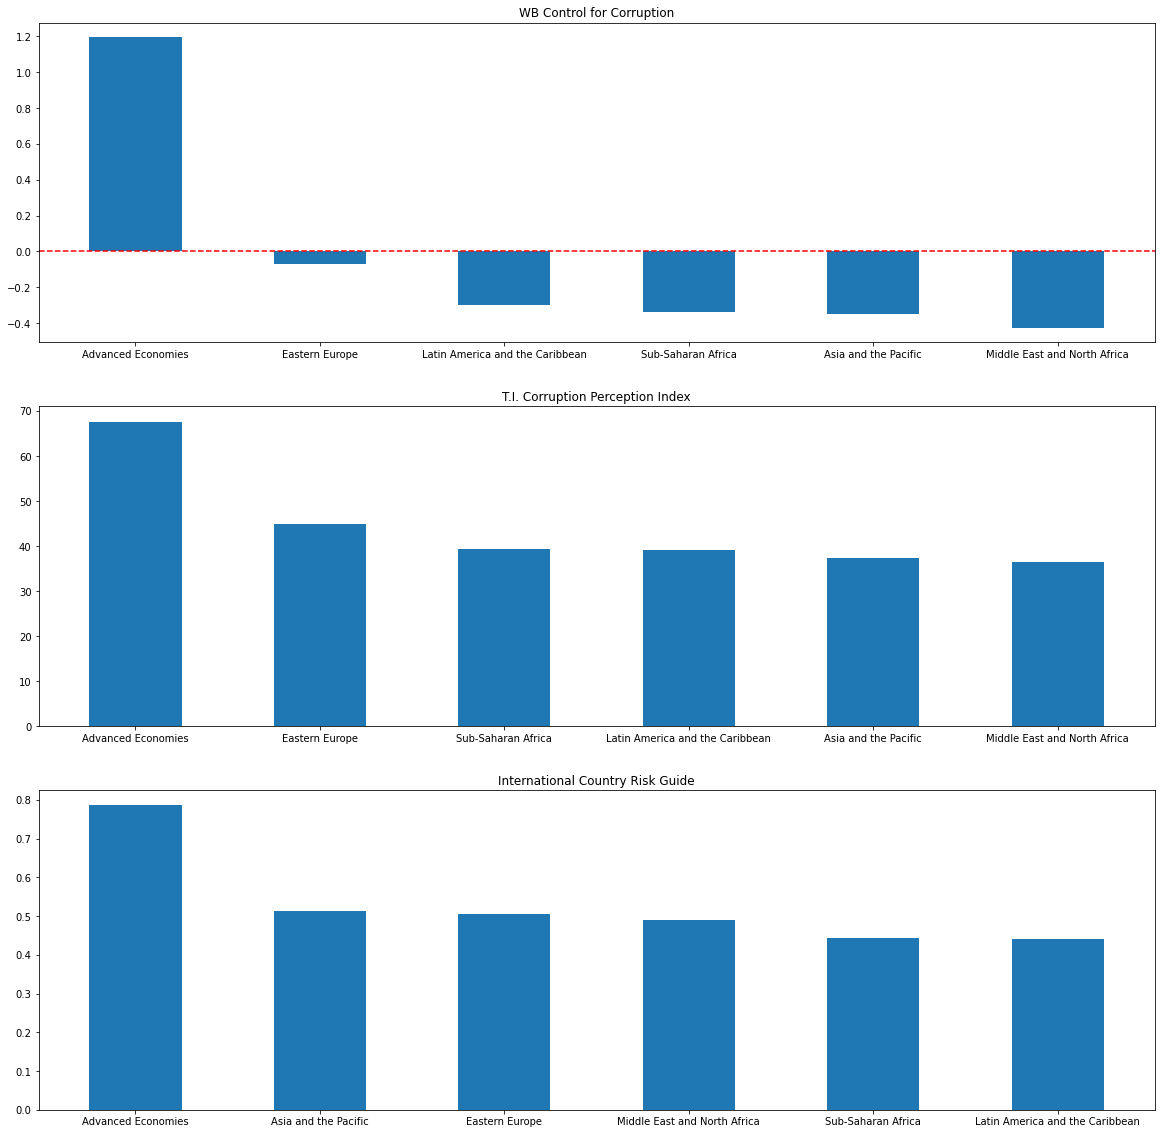

In [24]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize = (20, 20))

y_corr = Y.groupby(['region']).mean().sort_values(by=['Corruption_control'], ascending = False).reset_index()
ax1.bar(range(len(y_corr)), y_corr.Corruption_control, width = 0.5)
ax1.set_xticks(range(len(y_corr)))
ax1.set_xticklabels(y_corr['region'])
ax1.set_title("WB Control for Corruption")
ax1.axhline(y=0, color='r', linestyle='--')

y_corr = Y.groupby(['region']).mean().sort_values(by=['ti_cpi'], ascending = False).reset_index()
ax2.bar(y_corr.region, y_corr.ti_cpi, width = 0.5)
ax2.set_title("T.I. Corruption Perception Index")

y_corr = Y.groupby(['region']).mean().sort_values(by=['icrg_qog'], ascending = False).reset_index()
ax3.bar(y_corr.region, y_corr.icrg_qog, width = 0.5)
ax3.set_title("International Country Risk Guide")

plt.show()

In [25]:
X.columns

Index(['countryname', 'gdp_cap', 'gros_cap_form', 'gross_fixed_form',
       'total_pop', 'trade_open', 'dom_cred_fin', 'dom_cred_private',
       'dom_cred_banks', 'gdp_per_cap_growth', 'pop_growth', 'Voice',
       'Political_stab', 'Govt_Effect', 'Regulatory_qual', 'Rule_of_law',
       'region', 'fh_fog', 'fh_pr', 'hf_govint', 'region_freq'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

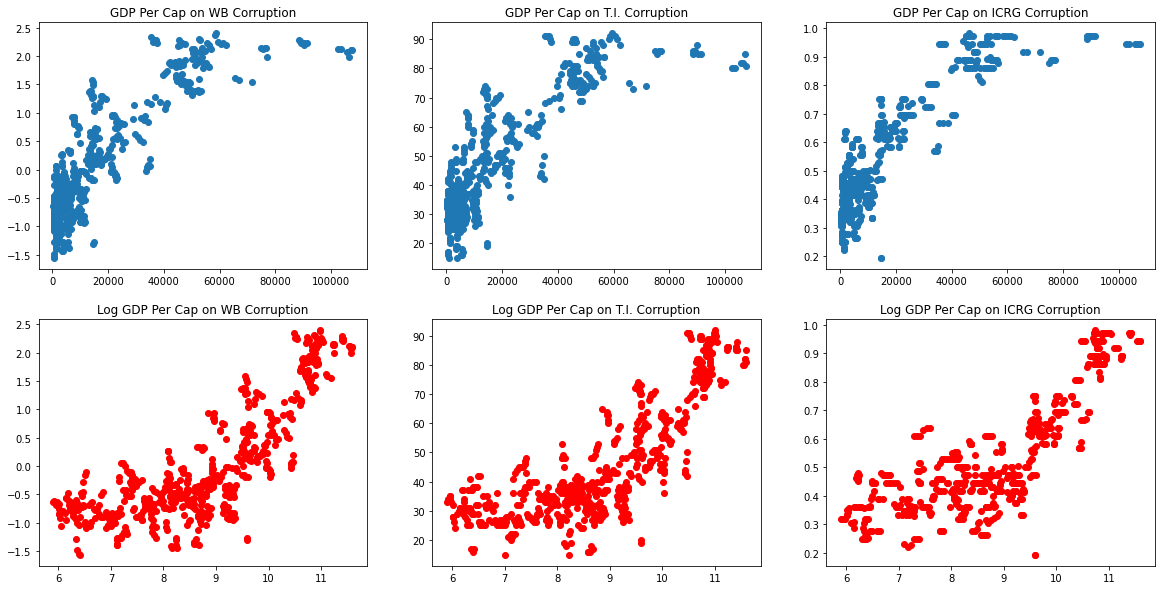

In [26]:
import numpy as np
plt.figure()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (20, 10))


ax1.scatter(X.gdp_cap, Y.Corruption_control)
ax1.set_title("GDP Per Cap on WB Corruption")
ax2.scatter(X.gdp_cap, Y.ti_cpi)
ax2.set_title("GDP Per Cap on T.I. Corruption")
ax3.scatter(X.gdp_cap, Y.icrg_qog)
ax3.set_title("GDP Per Cap on ICRG Corruption")

ax4.scatter(np.log(X.gdp_cap), Y.Corruption_control, color = 'r')
ax4.set_title("Log GDP Per Cap on WB Corruption")
ax5.scatter(np.log(X.gdp_cap), Y.ti_cpi, color = 'r')
ax5.set_title("Log GDP Per Cap on T.I. Corruption")
ax6.scatter(np.log(X.gdp_cap), Y.icrg_qog, color = 'r')
ax6.set_title("Log GDP Per Cap on ICRG Corruption")

plt.show()

<Figure size 432x288 with 0 Axes>

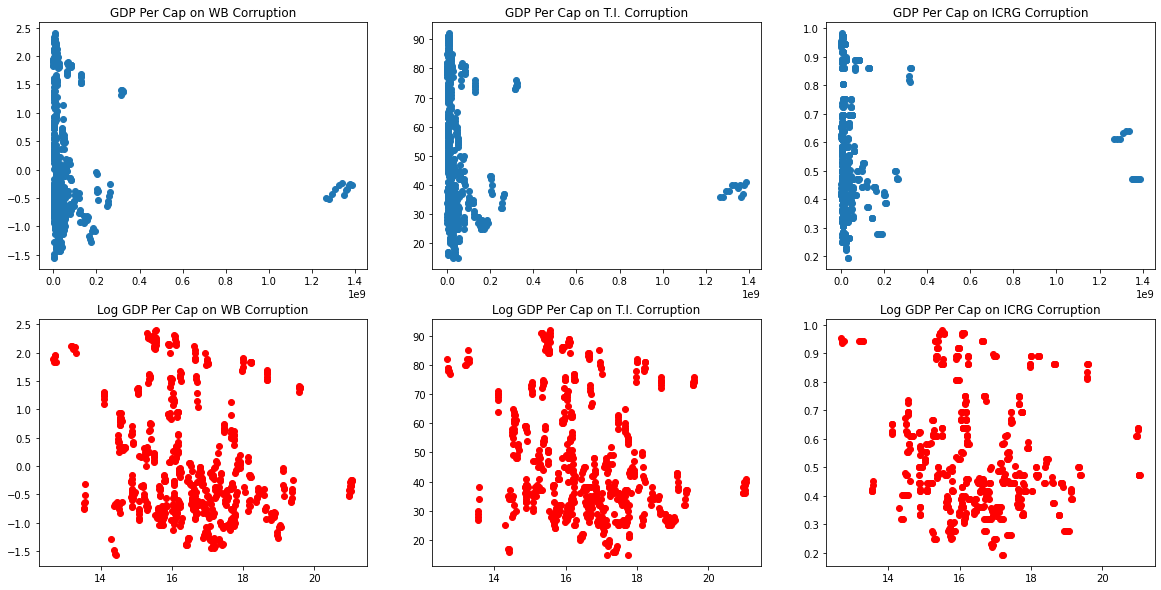

In [27]:
import numpy as np
plt.figure()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (20, 10))


ax1.scatter(X.total_pop, Y.Corruption_control)
ax1.set_title("GDP Per Cap on WB Corruption")
ax2.scatter(X.total_pop, Y.ti_cpi)
ax2.set_title("GDP Per Cap on T.I. Corruption")
ax3.scatter(X.total_pop, Y.icrg_qog)
ax3.set_title("GDP Per Cap on ICRG Corruption")

ax4.scatter(np.log(X.total_pop), Y.Corruption_control, color = 'r')
ax4.set_title("Log GDP Per Cap on WB Corruption")
ax5.scatter(np.log(X.total_pop), Y.ti_cpi, color = 'r')
ax5.set_title("Log GDP Per Cap on T.I. Corruption")
ax6.scatter(np.log(X.total_pop), Y.icrg_qog, color = 'r')
ax6.set_title("Log GDP Per Cap on ICRG Corruption")

plt.show()

In [28]:
X.describe()

,gdp_cap,gros_cap_form,gross_fixed_form,total_pop,trade_open,dom_cred_fin,dom_cred_private,dom_cred_banks,gdp_per_cap_growth,pop_growth,Voice,Political_stab,Govt_Effect,Regulatory_qual,Rule_of_law,fh_fog,fh_pr,hf_govint,region_freq
count,625.000000,625.000000,625.000000,6.250000e+02,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,16379.680685,24.369164,23.219163,5.744218e+07,87.269145,75.250517,60.129924,55.485091,2.050091,1.363446,0.144720,-0.022528,0.178336,0.222000,0.115424,7.051200,2.972800,44.867355,0.202417
std,20903.734693,7.537264,6.387135,1.864447e+08,54.258365,56.456934,43.905401,39.061635,3.049521,1.295691,0.897108,0.837429,0.949311,0.932904,0.990123,3.442839,1.905852,21.137369,0.068701
min,367.646762,6.699039,5.885067,3.207160e+05,20.722519,-10.151829,4.769306,4.714764,-22.312250,-1.398322,-1.880000,-2.480000,-1.770000,-1.900000,-1.820000,0.000000,1.000000,11.600000,0.073600
25%,2461.052647,19.939732,19.522509,5.430798e+06,55.605477,33.667877,27.882820,26.811002,0.585700,0.455937,-0.490000,-0.620000,-0.570000,-0.450000,-0.670000,4.000000,1.000000,29.000000,0.102400
50%,6909.993955,23.067431,22.453079,1.133142e+07,74.674302,57.797984,48.028678,46.850311,1.901024,1.220104,0.120000,-0.040000,-0.030000,0.080000,-0.160000,7.000000,3.000000,37.700001,0.249600
75%,21353.230260,27.795836,26.196781,3.798641e+07,103.050146,104.382632,82.395675,70.777608,3.515368,2.164441,0.970000,0.690000,1.010000,0.970000,0.930000,10.000000,4.000000,59.000000,0.256000
max,107479.511100,55.898619,52.418317,1.386395e+09,416.389236,279.075708,198.860071,182.096142,23.985510,7.349640,1.740000,1.620000,2.240000,2.260000,2.100000,12.000000,7.000000,95.000000,0.256000


In [29]:
X['countryname'][X['total_pop'] > 13e+07].unique()

['Bangladesh', 'Brazil', 'China', 'India', 'Indonesia', 'Nigeria', 'Russian Federation', 'United States']
Categories (311, object): ['Afghanistan' < 'Albania' < 'Algeria' < 'American Samoa' ... 'Yemen, South' < 'Yugoslavia' < 'Zambia' < 'Zimbabwe']

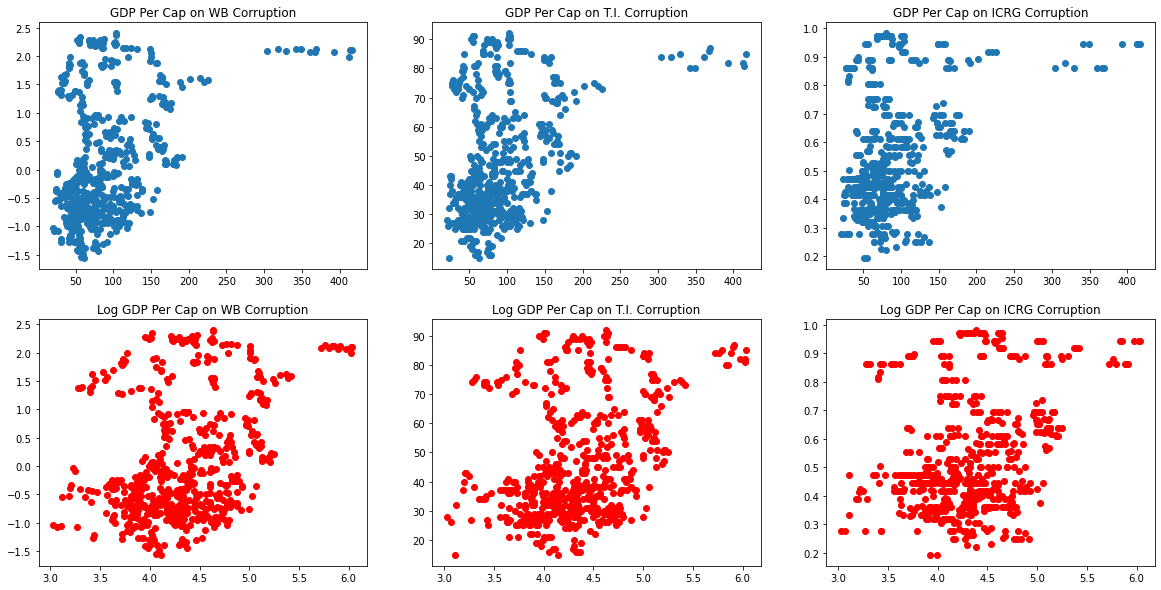

In [30]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (20, 10))


ax1.scatter(X.trade_open, Y.Corruption_control)
ax1.set_title("GDP Per Cap on WB Corruption")
ax2.scatter(X.trade_open, Y.ti_cpi)
ax2.set_title("GDP Per Cap on T.I. Corruption")
ax3.scatter(X.trade_open, Y.icrg_qog)
ax3.set_title("GDP Per Cap on ICRG Corruption")

ax4.scatter(np.log(X.trade_open), Y.Corruption_control, color = 'r')
ax4.set_title("Log GDP Per Cap on WB Corruption")
ax5.scatter(np.log(X.trade_open), Y.ti_cpi, color = 'r')
ax5.set_title("Log GDP Per Cap on T.I. Corruption")
ax6.scatter(np.log(X.trade_open), Y.icrg_qog, color = 'r')
ax6.set_title("Log GDP Per Cap on ICRG Corruption")

plt.show()

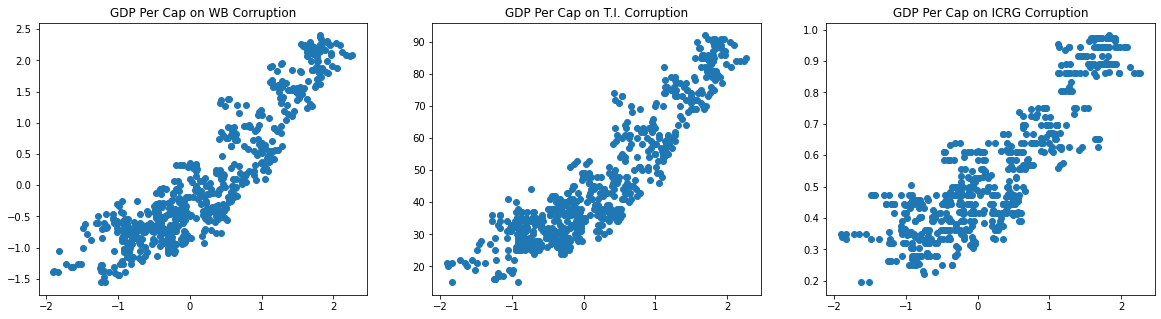

In [31]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (20, 5))


ax1.scatter(X.Regulatory_qual, Y.Corruption_control)
ax1.set_title("GDP Per Cap on WB Corruption")
ax2.scatter(X.Regulatory_qual, Y.ti_cpi)
ax2.set_title("GDP Per Cap on T.I. Corruption")
ax3.scatter(X.Regulatory_qual, Y.icrg_qog)
ax3.set_title("GDP Per Cap on ICRG Corruption")


plt.show()

In [32]:
Y.columns

Index(['Corruption_control', 'region', 'cpi_index', 'icrg_qog', 'ti_cpi',
       'vdem_corr', 'vdem_exbribe', 'vdem_excrptps', 'vdem_execorr',
       'vdem_exembez', 'vdem_exthftps', 'vdem_gcrrpt', 'vdem_jucorrdc',
       'vdem_mecorrpt', 'vdem_pubcorr'],
      dtype='object')

In [33]:
np.mean(Y['Corruption_control'][Y.region=='Sub-Saharan Africa'])

-0.33582738041877747

In [34]:
y_corr

,region,Corruption_control,cpi_index,icrg_qog,ti_cpi,vdem_corr,vdem_exbribe,vdem_excrptps,vdem_execorr,vdem_exembez,vdem_exthftps,vdem_gcrrpt,vdem_jucorrdc,vdem_mecorrpt,vdem_pubcorr
0,Advanced Economies,1.194813,67.631250,0.785829,67.631250,0.188879,3.098487,2.932889,0.172570,3.266496,1.785661,2.831563,3.094585,3.277448,0.177037
1,Asia and the Pacific,-0.346333,37.216667,0.513079,37.216667,0.559879,1.866087,1.716633,0.474323,2.286511,-0.190063,1.599342,2.204674,2.605728,0.522309
2,Eastern Europe,-0.070000,44.978261,0.506492,44.978261,0.442678,2.146505,2.084943,0.402490,2.478171,0.211554,1.803773,2.619881,2.596853,0.416397
3,Middle East and North Africa,-0.425938,36.375000,0.488534,36.375000,0.560690,1.857729,1.502542,0.486687,2.164169,-0.180670,1.815820,2.112364,2.320620,0.557955
4,Sub-Saharan Africa,-0.335827,39.381295,0.444553,39.381295,0.562114,1.836851,1.577862,0.534895,1.876673,-0.269673,1.860347,2.192087,2.369970,0.570324
5,Latin America and the Caribbean,-0.297949,39.134615,0.439911,39.134615,0.541266,1.884405,1.898087,0.482122,2.195451,0.077173,1.751863,2.140759,2.694562,0.466751


### Data Preprocessing 

In [35]:
from sklearn.preprocessing import StandardScaler
X.drop(['countryname', 'region'], axis=1, inplace=True)
X_df = StandardScaler().fit_transform(X)
X_df = pd.DataFrame(X_df, columns=X.columns)
X_df.head()

/Users/uzomailoanugo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gdp_cap,gros_cap_form,gross_fixed_form,total_pop,trade_open,dom_cred_fin,dom_cred_private,dom_cred_banks,gdp_per_cap_growth,pop_growth,Voice,Political_stab,Govt_Effect,Regulatory_qual,Rule_of_law,fh_fog,fh_pr,hf_govint,region_freq
0,-0.579454,0.525729,0.512301,-0.292770,-0.198450,-0.124496,-0.440514,-0.424496,-0.152584,-1.180699,-0.139136,-0.140389,-0.472653,-0.023601,-0.642276,-0.305574,0.014283,-0.561889,-1.87653
1,-0.577023,0.489074,0.448195,-0.292799,-0.210190,-0.134491,-0.463714,-0.451248,-0.283185,-1.194649,-0.105668,0.134481,-0.525365,-0.012873,-0.642276,-0.305574,0.014283,-0.656584,-1.87653
2,-0.572919,0.173348,0.147212,-0.292831,-0.218783,-0.128976,-0.475694,-0.463308,-0.022697,-1.213060,-0.005266,0.612516,-0.282890,-0.002146,-0.460335,-0.305574,0.014283,-0.684993,-1.87653
3,-0.567578,0.192516,0.187139,-0.292876,-0.285311,-0.217944,-0.523792,-0.515550,0.156885,-1.278065,0.017046,0.445204,-0.177466,-0.034329,-0.450227,-0.305574,0.014283,-0.656584,-1.87653
4,-0.559962,0.113482,0.180001,-0.292901,-0.229813,-0.243789,-0.535740,-0.534850,0.480879,-1.176628,0.028202,0.433253,-0.177466,-0.034329,-0.450227,-0.014883,0.014283,-0.561889,-1.87653


In [36]:
X.columns

Index(['gdp_cap', 'gros_cap_form', 'gross_fixed_form', 'total_pop',
       'trade_open', 'dom_cred_fin', 'dom_cred_private', 'dom_cred_banks',
       'gdp_per_cap_growth', 'pop_growth', 'Voice', 'Political_stab',
       'Govt_Effect', 'Regulatory_qual', 'Rule_of_law', 'fh_fog', 'fh_pr',
       'hf_govint', 'region_freq'],
      dtype='object')

In [37]:
X_df

,gdp_cap,gros_cap_form,gross_fixed_form,total_pop,trade_open,dom_cred_fin,dom_cred_private,dom_cred_banks,gdp_per_cap_growth,pop_growth,Voice,Political_stab,Govt_Effect,Regulatory_qual,Rule_of_law,fh_fog,fh_pr,hf_govint,region_freq
0,-0.579454,0.525729,0.512301,-0.292770,-0.198450,-0.124496,-0.440514,-0.424496,-0.152584,-1.180699,-0.139136,-0.140389,-0.472653,-0.023601,-0.642276,-0.305574,0.014283,-0.561889,-1.876530
1,-0.577023,0.489074,0.448195,-0.292799,-0.210190,-0.134491,-0.463714,-0.451248,-0.283185,-1.194649,-0.105668,0.134481,-0.525365,-0.012873,-0.642276,-0.305574,0.014283,-0.656584,-1.876530
2,-0.572919,0.173348,0.147212,-0.292831,-0.218783,-0.128976,-0.475694,-0.463308,-0.022697,-1.213060,-0.005266,0.612516,-0.282890,-0.002146,-0.460335,-0.305574,0.014283,-0.684993,-1.876530
3,-0.567578,0.192516,0.187139,-0.292876,-0.285311,-0.217944,-0.523792,-0.515550,0.156885,-1.278065,0.017046,0.445204,-0.177466,-0.034329,-0.450227,-0.305574,0.014283,-0.656584,-1.876530
4,-0.559962,0.113482,0.180001,-0.292901,-0.229813,-0.243789,-0.535740,-0.534850,0.480879,-1.176628,0.028202,0.433253,-0.177466,-0.034329,-0.450227,-0.014883,0.014283,-0.561889,-1.876530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,-0.725529,-2.012909,-2.199583,-0.236677,-0.527763,-0.850591,-0.943646,-0.942126,-0.609630,0.319930,-1.712111,-0.773786,-1.537434,-2.212074,-1.713708,-1.177646,1.064523,-1.082711,0.291107
621,-0.725179,-1.955847,-2.132532,-0.235408,-0.601265,-0.840852,-0.932740,-0.929986,-0.477143,0.302201,-1.567085,-0.821589,-1.463638,-2.276441,-1.562090,-1.177646,1.064523,-1.210549,0.291107
622,-0.725120,-1.903211,-2.072007,-0.234185,-0.562951,-0.771866,-0.953134,-0.959272,-0.639837,0.232005,-1.466682,-0.714032,-1.410926,-2.008246,-1.450904,-1.177646,1.064523,-1.130058,0.291107
623,-0.725589,-1.926351,-2.101422,-0.233027,-0.664948,-0.688549,-0.980878,-0.985552,-0.933240,0.143909,-1.477838,-0.714032,-1.410926,-2.083340,-1.501443,-1.177646,1.064523,-1.130058,0.291107
